# Implementation of famous research paper (SIAMESE NETWORK) in pytorch [PAPER TO PROJECT]

**1) Importing important libraries**

In [3]:
import torch.nn as nn
import torch .nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

In [2]:
!pip install opencv-python

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

**2) Creating Directories using "os"**

In [7]:
POS_PATH=os.path.join('data','positives')
NEG_PATH=os.path.join('data','negatives')
ARCH_PATH=os.path.join('data','archs')

os.makedirs(POS_PATH,exist_ok=True)
os.makedirs(NEG_PATH,exist_ok=True)
os.makedirs(ARCH_PATH,exist_ok=True)

In [8]:
POS_PATH

'data\\positives'

**3) Giving universal unique identifier(uuid) to each image in files basically to identify each image uniquely and importing them into specific folders at the same time using different trigger keys**

In [17]:
import uuid

In [26]:
cap=cv2.VideoCapture(0)
while(True):
    ret,frame=cap.read()
    cv2.imshow('Image',frame[150:150+250,220:220+250,:])
    if cv2.waitKey(1)&0XFF==ord('p'):
        imagename=os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imagename,frame)
    if cv2.waitKey(1)&0XFF==ord('a'):
        imagename=os.path.join(ARCH_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imagename,frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

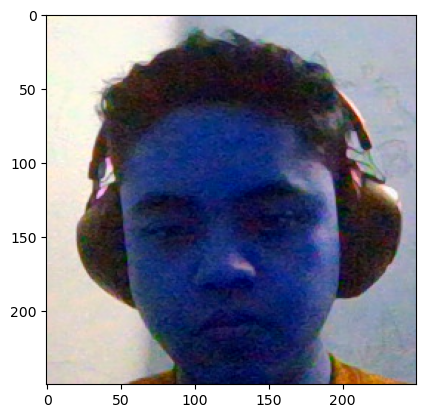

In [15]:
plt.imshow(frame[150:150+250,220:220+250,:])

**4) Unzipping the negatives that we have downloaded and transferring to previously created files**

In [36]:
!tar xf lfw.tgz

In [38]:
for directory in os.listdir('lfw'):
    directory_path=os.path.join('lfw',directory)
    for file in os.listdir(directory_path):
        EX_PATH=os.path.join('lfw',directory,file)
        NEW_PATH=os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)

**5) Importing data from "RESEARCH" directory**

In [6]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

target_size=(250,250)
path=r'D:\RESEARCH\data'

data=datasets.ImageFolder(root=path,transform=transforms.Compose([transforms.Resize(target_size),transforms.ToTensor(),]))




In [7]:
data

Dataset ImageFolder
    Number of datapoints: 900
    Root location: D:\RESEARCH\data
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [8]:
class_labels = data.classes
class_names = [name.split("\\")[-1] for name in class_labels]  # Extract class names from paths

# Print the available classes
print("Available Classes:", class_names)

Available Classes: ['archs', 'negatives', 'positives']


**6) Partitioning the data and bacthcing it for training**

In [9]:
info_anchor=[]
info_neg=[]
info_pos=[]
for x,y in data:
    if y==0:
        info_anchor.append(x[0])
    elif y==1:
        info_neg.append(x[0])
    else:
        info_pos.append(x[0])

In [17]:
len(info_anchor)

300

In [82]:


info_0_tensor = torch.zeros(300, 1, 250, 250)
info_1_tensor = torch.zeros(300, 1, 250, 250)
info_2_tensor = torch.zeros(300, 1, 250, 250)
label_0_tensor = torch.zeros(300)
label_1_tensor = torch.zeros(300)
label_2_tensor = torch.zeros(300)

for i in range(300):
    info_0_tensor[i, 0, :, :] = torch.tensor(info_anchor[i]).view(1, 250, 250)
    info_1_tensor[i, 0, :, :] = torch.tensor(info_neg[i]).view(1, 250, 250)
    info_2_tensor[i, 0, :, :] = torch.tensor(info_pos[i]).view(1, 250, 250)

    label_0_tensor[i] = torch.tensor([0])
    label_1_tensor[i] = torch.tensor([1])
    label_2_tensor[i] = torch.tensor([0])


train_data,test_data,train_label,test_label=train_test_split(info_0_tensor,label_0_tensor,train_size=0.9)
train_0_pytorch=TensorDataset(train_data,train_label)
test_0_pytorch=TensorDataset(test_data,test_label)
train_0_loader=DataLoader(train_0_pytorch,shuffle=True,batch_size=32,drop_last=True)
test_0_loader=DataLoader(train_0_pytorch,shuffle=True,batch_size=32,drop_last=True)

train_data,test_data,train_label,test_label=train_test_split(info_1_tensor,label_1_tensor,train_size=0.9)
train_1_pytorch=TensorDataset(train_data,train_label)
test_1_pytorch=TensorDataset(test_data,test_label)
train_1_loader=DataLoader(train_1_pytorch,shuffle=True,batch_size=32,drop_last=True)
test_1_loader=DataLoader(train_1_pytorch,shuffle=True,batch_size=32,drop_last=True)

train_data,test_data,train_label,test_label=train_test_split(info_2_tensor,label_2_tensor,train_size=0.9)
train_2_pytorch=TensorDataset(train_data,train_label)
test_2_pytorch=TensorDataset(test_data,test_label)
train_2_loader=DataLoader(train_2_pytorch,shuffle=True,batch_size=32,drop_last=True)
test_2_loader=DataLoader(train_2_pytorch,shuffle=True,batch_size=32,drop_last=True)

C:\Users\Chiranjeet\AppData\Local\Temp\ipykernel_22188\2254438236.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  info_0_tensor[i, 0, :, :] = torch.tensor(info_anchor[i]).view(1, 250, 250)
C:\Users\Chiranjeet\AppData\Local\Temp\ipykernel_22188\2254438236.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  info_1_tensor[i, 0, :, :] = torch.tensor(info_neg[i]).view(1, 250, 250)
C:\Users\Chiranjeet\AppData\Local\Temp\ipykernel_22188\2254438236.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  info_2_tensor[i, 0, :, :] = torch.tensor(

In [83]:
for x,y in train_0_loader:
    print(x.shape,y.shape)

torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])
torch.Size([32, 1, 250, 250]) torch.Size([32])


**7) Creating user defined ContrastiveLoss mentioned in the paper**

In [69]:
#loss fuction definition 
class ContrastiveLoss(torch.nn.Module):
    def __init__ (self,margin=2.0):
        super(ContrastiveLoss,self).__init__()
        #defining parameters
        self.margin =margin
        
    def forward(self,output1,output2,label):
        #calculate the euclidean distance and calculate the contastive loss
        euclidean_distance = F.pairwise_distance(output1,output2,keepdim = True)
        loss_contrastive =torch.mean((1-label)*torch.pow(euclidean_distance,2)+
        (label)*torch.pow(torch.clamp(self.margin-euclidean_distance,min=0.0),2))
        
        return loss_contrastive

**8) Creating working SIAMESE network architecture by getting ideas from the paper**

In [70]:
#Saemese Network

import torch
import torch.nn as nn

class Siamese(nn.Module):
    class arc(nn.Module):
        def __init__(self):
            super().__init__()
            ### Convolutional layers
            self.cnn1 = nn.Sequential(
                nn.Conv2d(1, 96, kernel_size=3, stride=4),
                nn.ReLU(),
                nn.MaxPool2d(3, stride=2),
                nn.Conv2d(96, 256, kernel_size=5, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(2, stride=2),
                nn.Conv2d(256, 384, kernel_size=3, stride=1),
                nn.ReLU(inplace=True)
            )
            # Calculate the output size after convolutional layers
            self.conv_output_size = self._get_conv_output_size()

            # Setting up the fully connected layers
            self.fc1 = nn.Sequential(
                nn.Linear(self.conv_output_size, 1024),  # Adjust input features to match conv_output_size
                nn.ReLU(),
                nn.Linear(1024, 256),
                nn.ReLU(),
                nn.Linear(256, 2)
            )

        def _get_conv_output_size(self):
            # Compute the output size after convolutional layers
            with torch.no_grad():
                dummy_input = torch.zeros(1, 1, 250, 250)  # Assuming input size is 250x250
                conv_output = self.cnn1(dummy_input)
                conv_output_size = conv_output.view(conv_output.size(0), -1).size(1)
            return conv_output_size

        def forward_once(self, x):
            output = self.cnn1(x)
            output = output.view(output.size(0), -1)  # Flatten the output tensor
            output = self.fc1(output)
            return output

        def forward(self, input1, input2):
            output1 = self.forward_once(input1)
            output2 = self.forward_once(input2)
            return output1, output2

    def __init__(self):
        super().__init__()
        self.siamese_network = self.arc()

    def forward(self, input1, input2):
        return self.siamese_network(input1, input2)


def network():
    net = Siamese()
    losfunc = ContrastiveLoss()
    optim = torch.optim.Adam(net.parameters(), lr=0.001)
    
    return net, losfunc, optim





In [71]:
net,losfunc,optim=network()

In [66]:
net

Siamese(
  (siamese_network): arc(
    (cnn1): Sequential(
      (0): Conv2d(1, 96, kernel_size=(3, 3), stride=(4, 4))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1))
      (7): ReLU(inplace=True)
    )
    (fc1): Sequential(
      (0): Linear(in_features=46464, out_features=1024, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1024, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
  )
)

**9) Creating an instance of fake data for passing through the network to check if everything is working right or not**

In [79]:

x = torch.randn(1, 1, 250, 250)
y= torch.randn(1, 1, 250, 250)
# Example input tensor
output=net(x,y)
print(output)




(tensor([[-3.0215,  7.0274]], grad_fn=<AddmmBackward0>), tensor([[-3.0176,  7.0446]], grad_fn=<AddmmBackward0>))


**10)Creating a training function compatible to the multiple output architecture**

In [87]:
#passing it through the values
def train(net, losfunc, optim, train_0_loader, train_2_loader, test_0_loader, test_2_loader, epochs=100):
    loss_train = []
    loss_test = []

    for epoch in range(epochs): 
        for (x_1, y_1), (x_2, y_2) in zip(train_0_loader, train_2_loader):
                net.train()
                yhat_1, yhat_2 = net(x_1, x_2)
                loss = losfunc(yhat_1, yhat_2, y_1)


                # Backward pass
                optim.zero_grad()
                loss.backward()
                optim.step()

                loss_train.append(loss.item())

        for (x_1, y_1), (x_2, y_2) in zip(train_0_loader, train_2_loader):
                net.eval()
                # Forward pass
                yhat_1, yhat_2 = net(x_1, x_2)
                loss = losfunc(yhat_1, yhat_2, y_1)

                loss_test.append(loss.item())

    return loss_train, loss_test,net


In [89]:
 loss_train, loss_test,net=train(net, losfunc, optim, train_0_loader, train_2_loader, test_0_loader, test_2_loader, epochs=100)

In [90]:
loss_train

[5.527718016651306e-08,
 5.8577686701255516e-08,
 1.1540588218394987e-07,
 3.4740015308898364e-08,
 4.565072586615315e-08,
 6.930076779099181e-08,
 2.8790307027293238e-08,
 1.0859655930062218e-07,
 4.779775863994473e-08,
 7.755588171676209e-08,
 4.309327650275918e-08,
 1.9930853412120086e-08,
 2.663107245837182e-08,
 2.8717890288021408e-08,
 4.472492776130821e-08,
 2.833900403231837e-08,
 4.237619677383009e-08,
 3.8595548090825105e-08,
 6.910395455861362e-08,
 3.021778738343528e-08,
 5.192356056227254e-08,
 7.841487104087719e-08,
 4.6666002617712365e-08,
 7.973847715447846e-08,
 5.06299464575477e-08,
 7.127390944106082e-08,
 8.760829928178282e-08,
 7.38949736955874e-08,
 1.3433653123229305e-07,
 6.940953767298197e-08,
 1.0363532254586971e-07,
 6.678499886447753e-08,
 8.333668688464968e-08,
 1.031192482514598e-07,
 3.0887083113384506e-08,
 7.036577898134055e-08,
 1.5182713752892596e-07,
 2.607956446354365e-07,
 1.0007743611595288e-07,
 8.813145768726827e-08,
 2.4786552899058734e-07,
 1.

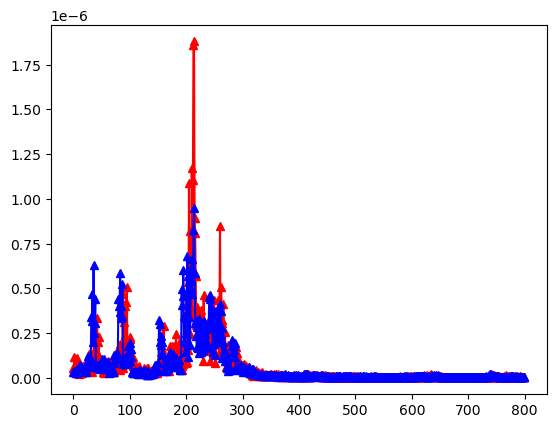

In [93]:

plt.plot(loss_train,'r^-')
plt.plot(loss_test,'b^-')

**11) Using Euclidean distance to differentiate positive and negatives**

In [129]:
x,y=next(iter(train_0_loader))
x_1,y_1=next(iter(train_1_loader))
x_2,y_2=next(iter(train_2_loader))
output_1,output_2=net(x,x_1)
output_3,output_4=net(x,x_2)
similarity_1=F.pairwise_distance(output_3,output_4)
similarity=F.pairwise_distance(output_1,output_2)
print(similarity_1)
print(similarity)

tensor([1.6064e-04, 2.7940e-05, 3.1236e-05, 1.2562e-04, 1.6353e-06, 1.0673e-04,
        1.0659e-04, 8.0889e-05, 6.7923e-05, 6.4562e-05, 9.0838e-05, 8.0660e-05,
        4.7450e-05, 1.6541e-05, 1.5452e-05, 1.0662e-04, 7.7757e-05, 5.3569e-05,
        2.4170e-05, 1.1588e-05, 7.5811e-05, 3.0322e-05, 7.3756e-05, 5.0895e-05,
        1.2238e-04, 4.6117e-05, 6.2961e-05, 5.0414e-05, 5.1708e-05, 4.7672e-05,
        3.9189e-05, 1.0763e-04], grad_fn=<NormBackward1>)
tensor([0.0002, 0.0003, 0.0008, 0.0013, 0.0011, 0.0003, 0.0018, 0.0010, 0.0029,
        0.0011, 0.0010, 0.0008, 0.0008, 0.0020, 0.0012, 0.0002, 0.0004, 0.0011,
        0.0003, 0.0013, 0.0005, 0.0005, 0.0010, 0.0006, 0.0014, 0.0005, 0.0006,
        0.0001, 0.0011, 0.0002, 0.0013, 0.0004], grad_fn=<NormBackward1>)


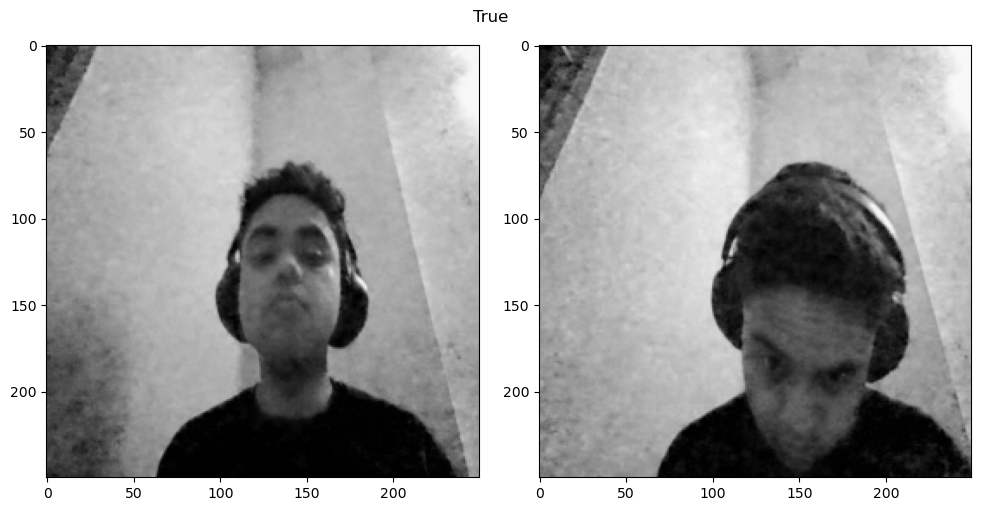

In [130]:
x_1,y_1=next(iter(train_0_loader))

x_3,y_3=next(iter(train_2_loader))


output_3,output_4=net(x_1,x_3)

x_plot_1 = np.transpose(x_1, (0, 2, 3, 1))
x_plot_3 = np.transpose(x_3, (0, 2, 3, 1))

x_rgb_1 = np.repeat(x_plot_1, 3 ,axis=3)

x_rgb_3 = np.repeat(x_plot_3, 3 ,axis=3)
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(x_rgb_1[0])
ax[1].imshow(x_rgb_3[0])

plt.suptitle(f'{(F.pairwise_distance(output_3[0],output_4[0])<1e-04)}')

plt.tight_layout()
plt.show()



    
                    

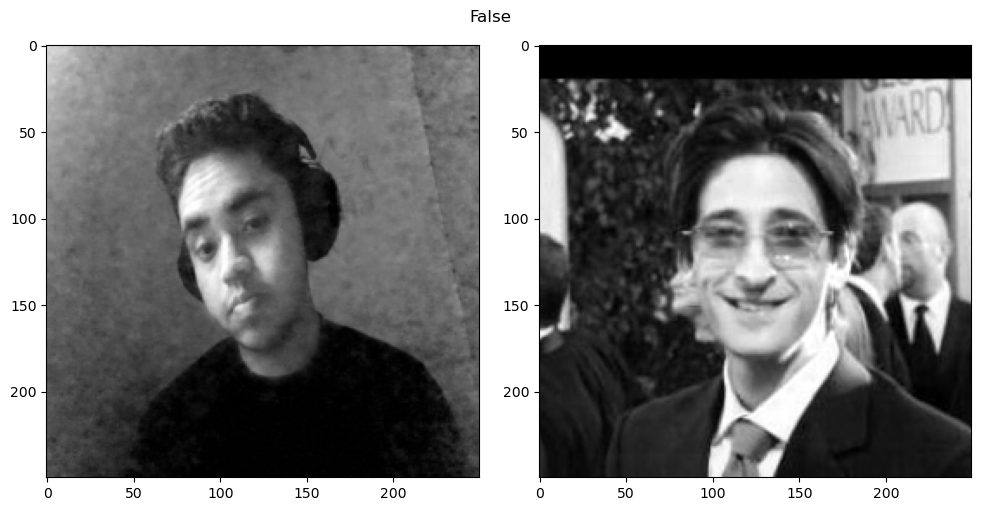

In [127]:
x_1,y_1=next(iter(train_0_loader))
x_2,y_2=next(iter(train_1_loader))
output_1,output_2=net(x_1,x_2)
x_plot_1 = np.transpose(x_1, (0, 2, 3, 1))
x_plot_2 = np.transpose(x_2, (0, 2, 3, 1))
x_rgb_1 = np.repeat(x_plot_1, 3 ,axis=3)
x_rgb_2 = np.repeat(x_plot_2, 3 ,axis=3)
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(x_rgb_1[0])
ax[1].imshow(x_rgb_2[0])

plt.suptitle(f'{(F.pairwise_distance(output_1[0],output_2[0])<1e-04)}')

plt.tight_layout()
plt.show()

# Hence, we have succesfully converted paper research work into real time implementation project 